In [1]:
print("""\
# *************************************************************************** #
# *************************************************************************** #
# TP7 : PRIMALITE DES ENTIERS                                                 #
# *************************************************************************** #
# *************************************************************************** #
""")

# CONSIGNES
#
# Les seules lignes a modifier sont annoncee par "Code pour l'exercice"
# indique en commmentaire et son signalees
# Ne changez pas le nom des variables
#
# CONSEILS
#
# Ce modele vous sert a restituer votre travail. Il est deconseille d'ecrire
# une longue suite d'instruction et de debugger ensuite. Il vaut mieux tester
# le code que vous produisez ligne apres ligne, afficher les resultats et
# controler que les objets que vous definissez sont bien ceux que vous attendez.
#
# Vous devez verifier votre code en le testant, y compris par des exemples que
# vous aurez fabrique vous-meme.
#


reset()
print("""\
# ****************************************************************************
# TEST DE RABIN-MILLER 
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

n = 561

# Code pour l'EXERCICE

def testRM(n):
    return ZZ(n).is_prime() # A MODIFIER

# # Affichage des resultats

print "Test de la primalite de n=",n,"avec implementation de Rabin-Miller"
print testRM(n)

print("""\
# ****************************************************************************
#  PERFORMANCES DE RABIN-MILLER
# ****************************************************************************
""")

# Donnees de l'enonce de l'exercice

nmin=10
nmax=500
nbtests = 1

# Code pour l'EXERCICE

rep2 = "A compléter - réponse à la Q2"
rep3 = "A compléter - réponse à la Q3"

# # Affichage des resultats

bar_chart( [sum( [testRM(n) for i in range(nbtests)]) for n in range(nmin,nmax)])
print(rep2)
print(rep3)
list_plot( [timeit( 'testRM(n)', number=20, repeat=3, seconds=true) for n in range(1001,1001+100000,100) ])


reset()
print("""\
# ****************************************************************************
# TEST DE SOLOVAY-STRASSEN 
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

n = 561

# Code pour l'EXERCICE

def testRM(n):
    return ZZ(n).is_prime() # A MODIFIER

rep3 = "A compléter - réponse à la Q3"
rep4 = "A compléter - réponse à la Q4"

# # Affichage des resultats

print "Test de la primalite de n=",n,"avec implementation de Solovay-Strassen"
print testRM(n)
print(rep3)
print(rep4)


reset()
print("""\
# ****************************************************************************
# COMPARAISON ENTRE LES TESTS DE R-M ET S-S 
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

nmax=150

# Code pour l'EXERCICE

Temoins = []

# # Affichage des resultats

print "Liste d'entiers composés et de temoins exclusifs de Rabin-Miller"
print Temoins



reset()
print("""\
# ****************************************************************************
# TEST DE LUCAS
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice


# Code pour l'EXERCICE

def testL(n):
    return ZZ(n).is_prime() # A MODIFIER

# # Affichage des resultats

for _ in range(1):
    n =  ZZ.random_element(2,3)
    print n.is_prime()==testL(n)



reset()
print("""\
# ****************************************************************************
# TEST DE BAILLIE, POMERANCE, SELFRIDGE ET WAGSTAFF
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

nmax=1000

# Code pour l'EXERCICE

def testBPSW(n):
    return ZZ(n).is_prime() # A MODIFIER

# # Affichage des resultats

print all([ZZ(n).is_prime()==testBPSW(n) for n in range(2,nmax+1)])


# *************************************************************************** #
# *************************************************************************** #
# TP7 : PRIMALITE DES ENTIERS                                                 #
# *************************************************************************** #
# *************************************************************************** #

# ****************************************************************************
# TEST DE RABIN-MILLER 
# ****************************************************************************

Test de la primalite de n= 561 avec implementation de Rabin-Miller
False
# ****************************************************************************
#  PERFORMANCES DE RABIN-MILLER
# ****************************************************************************

A compléter - réponse à la Q2
A compléter - réponse à la Q3
# ****************************************************************************
# TEST DE SOL

### Rabin Miller

# ****************************************************************************
# TEST DE RABIN-MILLER 
# ****************************************************************************

164 | Resultat Rabin-Miller :  (False, 164)  | is it truly prime ? False
351 | Resultat Rabin-Miller :  (False, 351)  | is it truly prime ? False
181 | Resultat Rabin-Miller :  (True, 181)  | is it truly prime ? True
234 | Resultat Rabin-Miller :  (False, 2)  | is it truly prime ? False
112 | Resultat Rabin-Miller :  (False, 2)  | is it truly prime ? False
152 | Resultat Rabin-Miller :  (False, 4)  | is it truly prime ? False
522 | Resultat Rabin-Miller :  (False, 2)  | is it truly prime ? False
252 | Resultat Rabin-Miller :  (False, 7)  | is it truly prime ? False
137 | Resultat Rabin-Miller :  (True, 137)  | is it truly prime ? True
438 | Resultat Rabin-Miller :  (False, 438)  | is it truly prime ? False
# ****************************************************************************
#  PERFORMANCES DE RAB

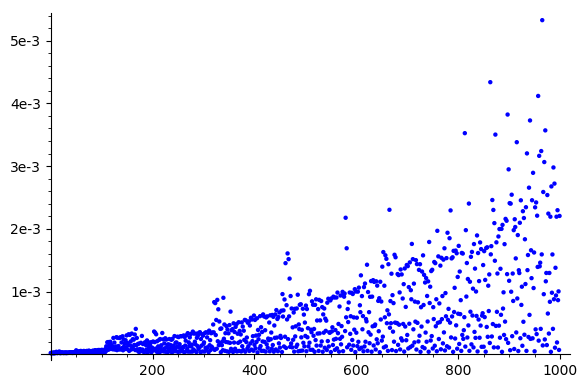

In [104]:
reset()
import time

print("""\
# ****************************************************************************
# TEST DE RABIN-MILLER 
# ****************************************************************************
""")

# Code pour l'EXERCICE

# return m and v s.t. n-1 = 2^v*m where m is odd
def get_m_v(n):
    m = 1
    v = 0
    d = n - 1
    while(d%2 == 0):
        d = d/2
        v += 1
    m = d
    return m, v        

def testRM(n):
    a = ZZ.random_element(2,n-1)
    m,v = get_m_v(n)
    g = gcd(a,n)
    if (g > 1):
        return False, g
    b = a^m%n
    if b == 1:
        return True, n
    for i in range(1,v+1):
        if b^2%n == 1:
            g = gcd((b+1), n)
            if g == 1 or g == n:
                return True, n
            else:
                return False, g
        b = b^2%n
    return False, n

def witnessRM(n):
    witnessess = []
    pseudo_primes = []
    m,v = get_m_v(n)
    # test all values in Z/nZ
    for a in range(2,n):
        wit = False
        if mod((a^m),n) != 1:
            wit = True
            for d in range(0,v):
                r = mod(a^((2^d)*m),n)
                if r == n-1:
                    wit = False
                    break
        if wit == True:
            witnessess.append(a)
        if wit == False:
            pseudo_primes.append(a)
    return witnessess, pseudo_primes


for _ in range(10):
    n=ZZ.random_element(3,600)
    print n, "| Resultat Rabin-Miller : ", testRM(n), " | is it truly prime ?", n.is_prime()

print("""\
# ****************************************************************************
#  PERFORMANCES DE RABIN-MILLER
# ****************************************************************************
""")

# Donnees de l'enonce de l'exercice

nmin=10
nmax=500
nbtests = 1

# Code pour l'EXERCICE

n=561

witnessess, pseudo = witnessRM(n)

rep2 = "A witness of 561 is ", witnessess[ZZ.random_element(len(witnessess))], " while it's pseudo-primality bases are ", pseudo
rep3 = "Altough we can clearly see that the excecution time of the algorithm tends to grow exponentially, in many cases, the algorithm finds an answer extremely quickly, even for cases where the number is big."


# # Affichage des resultats

bar_chart( [sum( [testRM(n)[1] for i in range(nbtests)]) for n in range(nmin,nmax)])
print rep2
print rep3
list_plot( [timeit( 'testRM(n)', number=20, repeat=3, seconds=true) for n in range(1001,1001+100000,100) ])


### Solovay-Strassen

# ****************************************************************************
# TEST DE SOLOVAY-STRASSEN 
# ****************************************************************************

Test de la primalite de n=  13  avec implementation de Solovay-Strassen  True  | Is n prime:  True
Testing with random integers on range [1000, 1500]
n is  705 | is n prime :  False  | Solovay-Strassen test :  False
n is  485 | is n prime :  False  | Solovay-Strassen test :  False
n is  177 | is n prime :  False  | Solovay-Strassen test :  False
n is  81 | is n prime :  False  | Solovay-Strassen test :  False
n is  620 | is n prime :  False  | Solovay-Strassen test :  False
n is  636 | is n prime :  False  | Solovay-Strassen test :  False
n is  1066 | is n prime :  False  | Solovay-Strassen test :  False
n is  5 | is n prime :  True  | Solovay-Strassen test :  True
n is  1387 | is n prime :  False  | Solovay-Strassen test :  False
n is  66 | is n prime :  False  | Solovay-Strassen test :  False
n is  9

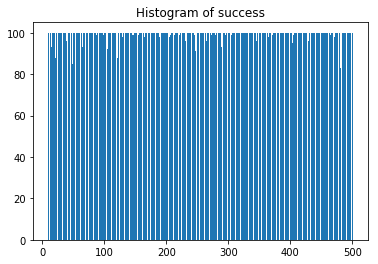

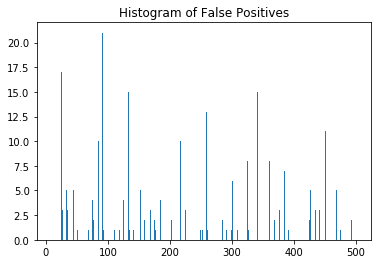

Some values of false positives are: 
Test failed at  189  prime divisors :  [3, 7]
Test failed at  309  prime divisors :  [3, 103]
Test failed at  21  prime divisors :  [3, 7]
Test failed at  231  prime divisors :  [3, 7, 11]
Test failed at  49  prime divisors :  [7]
Test failed at  49  prime divisors :  [7]
Test failed at  249  prime divisors :  [3, 83]
Test failed at  121  prime divisors :  [11]
Test failed at  469  prime divisors :  [7, 67]
Test failed at  125  prime divisors :  [5]

Since the test seems to generate false positives with probability < 0.5 for some numbers, we could boost the performance by reaplying the test!

No false positives!


In [354]:
reset()
import matplotlib.pyplot as plt

print("""\
# ****************************************************************************
# TEST DE SOLOVAY-STRASSEN 
# ****************************************************************************
""")

# for calculating the Jacobi Symbole
def epsilon(n):
    return (-1)^((n-1)/2)

def omega(n):
    return (-1)^((n^2 - 1)/8)

def upsilon(m,n):
    return (-1)^((m-1)*(n-1)*1/4)

# n >= 3
def Jacobi(m, n):
    if m<0:
        return epsilon(n)*Jacobi(-m,n)
    elif m > 0 and int(m)%2 == 0:
        return omega(n)*Jacobi(m/2,n)
    elif m > 1 and int(m)%2 != 0:
        return upsilon(m,n)*Jacobi(mod(n,m),m)
    elif m == 1:
            return 1
    elif m == 0:
            return 0

def testSS(n):
    if ( n%2 == 0):
        return False
    Zn = Zmod(n)
    a = Zn.random_element()
    while(a <= 1):
        a = Zn.random_element()
    #print'a = '  ,a
    g = gcd(int(a),n)
    if (g != 1):
        return False
    # using sagemath function
    if jacobi_symbol(a,n) == a^((n-1)/2):
        return True
    else:
        return False


rep3 = "A compléter - réponse à la Q3"
rep4 = "A compléter - réponse à la Q4"

# # Affichage des resultats
n = 13
print "Test de la primalite de n= ", n , " avec implementation de Solovay-Strassen ", testSS(n), " | Is n prime: ", n.is_prime()

# # Affichage des resultats
print 'Testing with random integers on range [1000, 1500]'
for _ in range(15):
    n =  ZZ.random_element(1500)
    print 'n is ', n , '| is n prime : ', n.is_prime(), ' | Solovay-Strassen test : ',  testSS(n)

    
print '\nTesting accuracy from range 10, 500 \n'
nmin = 10
nmax = 500
n_tests = 100
N = [i for i in range(nmin, nmax+1)]
T = [0]*len(N)  

k = 0
for i in N:
    #print 'number = ', i+10, '\n'
    for j in range(n_tests):
        #print 'test = ', j
        if ZZ(i).is_prime() == testSS(i):
            T[k] = T[k] + 1
    k += 1
nmin = 10
nmax = 500
n_tests = 100
N = [i for i in range(nmin, nmax+1)]
T = [0]*len(N)  
FP = [0]*len(N) 
k = 0
for i in N:
    #print 'number = ', i+10, '\n'
    for j in range(n_tests):
        #print 'test = ', j
        result = testSS(i)
        if ZZ(i).is_prime() == result:
            T[k] = T[k] + 1
        elif result == True :
            FP[k] += 1
    k += 1
            
fig, ax = plt.subplots()
plt.bar(N, T)
plt.title('Histogram of success')
plt.show()

fig, ax = plt.subplots()
plt.bar(N, FP)
plt.title('Histogram of False Positives')
plt.show()

print 'Some values of false positives are: '
k = 0
while (k < 10):
    n =  ZZ.random_element(len(N))
    if (FP[n] > 0):
        k += 1
        print 'Test failed at ', N[n] , ' prime divisors : ', ZZ(N[n]).prime_divisors()

print '\nSince the test seems to generate false positives with probability < 0.5 for some numbers, we could boost the performance by reaplying the test!\n'


N = [i for i in range(nmin, nmax+1)]
T = [0]*len(N)  
FP = [0]*len(N) 
k = 0
for i in N:
    #print 'number = ', i+10, '\n'
    for j in range(n_tests):
        #print 'test = ', j
        result = (testSS(i) and testSS(i) and testSS(i) and testSS(i))
        if ZZ(i).is_prime() == result:
            T[k] = T[k] + 1
        elif result == True :
            FP[k] += 1
    k += 1
            
if sum(FP) != 0:
    
    fig, ax = plt.subplots()
    plt.bar(N, T)
    plt.title('Histogram of success with test applied 4 times')
    plt.show()
    
    fig, ax = plt.subplots()
    plt.bar(N, FP)
    plt.title('Histogram of False Positives with test applied 4 times')
    plt.show()

    print 'Some values of false positives are: '
    k = 0
    while (k < 10):
        n =  ZZ.random_element(len(N))
        if (FP[n] > 0):
            k += 1
            print 'Test failed at ', N[n] , ' prime divisors : ', ZZ(N[n]).prime_divisors()

else:
    print 'No false positives!'


### Comparison RM and SS

In [355]:
reset()
print("""\
# ****************************************************************************
# COMPARAISON ENTRE LES TESTS DE R-M ET S-S 
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

nmax=150

# Code pour l'EXERCICE

Temoins = []

# # Affichage des resultats

print "Liste d'entiers composés et de temoins exclusifs de Rabin-Miller"
print Temoins


# ****************************************************************************
# COMPARAISON ENTRE LES TESTS DE R-M ET S-S 
# ****************************************************************************

Liste d'entiers composés et de temoins exclusifs de Rabin-Miller
[]


### Test de Lucas

In [306]:
reset()
print("""\
# ****************************************************************************
# TEST DE LUCAS
# ****************************************************************************
""")

# returns the result of the sequence uk ad vk using the closed formula
def get_u(k, p, q):
    x = PolynomialRing(RationalField(), 'x').gen()
    f = x^2 - p*x + q
    rho, sigma = f.roots(multiplicities = False)
    return (rho^k - sigma^k)/(rho - sigma)

def get_v(k, p, q):
    x = PolynomialRing(RationalField(), 'x').gen()
    f = x^2 - p*x + q
    rho, sigma = f.roots(multiplicities = False)
    return (rho^k + sigma^k)

# return m and v s.t. n = 2^t*m where m is odd
def get_m_t(c):
    m = 1
    t = 0
    d = c
    while(d%2 == 0):
        d = d/2
        t += 1
    m = d
    return m, t   

# Code pour l'EXERCICE
# returns 0 if composed, 1 if 
def testL(n, p, q):
    delta = p^2 - 4*q
    g = gcd(n,(2*q*delta))
    # 0 : g is a factor of n
    if 1 < g and g < n:
        return False
    # 2 : bad choice of p and q
    elif g == n:
        return False
    
    jac = jacobi_symbol(delta,n)
    m,t = get_m_t(n - jac)
    um = get_u(m, p, q)
    g = gcd(n,um)
    # 0 : g is a factor of n
    if 1 < g and g < n:
        return False
    # 1 : pseudoprime
    elif g == n:
        return True
    for s in range(0,t):
        v2sm = get_v((2^s)*m, p, q)
        g = gcd(n,v2sm)
        if 1 < g and g < n:
            return False
        # 1 : pseudoprime
        elif g == n:
            return True
    # n is composed
    return False
    
# # Affichage des resultats

for _ in range(15):
    n =  ZZ.random_element(50,10000)
    print 'n is ', n , '| is n prime : ', n.is_prime(), ' | Lucas test : ',testL(n, 9, 20)


# ****************************************************************************
# TEST DE LUCAS
# ****************************************************************************

n is  7346 | is n prime :  False  | Lucas test :  False
n is  1115 | is n prime :  False  | Lucas test :  False
n is  9259 | is n prime :  False  | Lucas test :  False
n is  3426 | is n prime :  False  | Lucas test :  False
n is  7725 | is n prime :  False  | Lucas test :  False
n is  4665 | is n prime :  False  | Lucas test :  False
n is  7096 | is n prime :  False  | Lucas test :  False
n is  9171 | is n prime :  False  | Lucas test :  False
n is  4133 | is n prime :  True  | Lucas test :  True
n is  5491 | is n prime :  False  | Lucas test :  False
n is  9385 | is n prime :  False  | Lucas test :  False
n is  9355 | is n prime :  False  | Lucas test :  False
n is  3755 | is n prime :  False  | Lucas test :  False
n is  9212 | is n prime :  False  | Lucas test :  False
n is  9838 | is n prime :  False  | Lucas t

### BPSW

In [305]:
reset()
print("""\
# ****************************************************************************
# TEST DE BAILLIE, POMERANCE, SELFRIDGE ET WAGSTAFF
# ****************************************************************************
""")

# return m and v s.t. n-1 = 2^v*m where m is odd
def get_m_v(n):
    m = 1
    v = 0
    d = n - 1
    while(d%2 == 0):
        d = d/2
        v += 1
    m = d
    return m, v    

def testRM(n):
    a = 2
    m,v = get_m_v(n)
    g = gcd(a,n)
    if (g > 1):
        return False, g
    b = a^m%n
    if b == 1:
        return True, n
    for i in range(1,v+1):
        if b^2%n == 1:
            g = gcd((b+1), n)
            if g == 1 or g == n:
                return True, n
            else:
                return False, g
        b = b^2%n
    return False, n


# Using the closed formula required complex roots, wich imply on floating point errors.
# for the function to work, the whole sequence of u and v was generated. Not efficient, but easy to implement.
def get_u(m,p,q):
    U = [0]*(int(m)+1)
    U[1] = 1
    k = 2
    while(k <= m):
        U[k] = p*U[k-1] - q*U[k-2]
        k += 1
    return U[int(m)]

def get_v(m,p,q):
    V = [0]*(int(m)+1)
    V[0] = 2
    V[1] = p
    k = 2
    while(k <= m):
        V[k] = p*V[k-1] - q*V[k-2]
        k += 1
    return V[int(m)]


# return m and v s.t. n = 2^t*m where m is odd
def get_m_t(c):
    m = 1
    t = 0
    d = c
    while(d%2 == 0):
        d = d/2
        t += 1
    m = d
    return m, t   

# Code pour l'EXERCICE
# returns 0 if composed, 1 if 
def testL(n, p, q):
    delta = p^2 - 4*q
    g = gcd(n,(2*q*delta))
    # 0 : g is a factor of n
    if 1 < g and g < n:
        return False
    # 2 : bad choice of p and q
    elif g == n:
        return False
    
    jac = jacobi_symbol(delta,n)
    m,t = get_m_t(n - jac)
    um = get_u(m, p, q)
    g = gcd(n,um)
    # 0 : g is a factor of n
    if 1 < g and g < n:
        return False
    # 1 : pseudoprime
    elif g == n:
        return True
    for s in range(0,t):
        v2sm = get_v((2^s)*m, p, q)
        g = gcd(n,v2sm)
        if 1 < g and g < n:
            return False
        # 1 : pseudoprime
        elif g == n:
            return True
    # n is composed
    return False
    

# Code pour l'EXERCICE

def testBPSW(n):
    # avoids a lot of calculations
    if n == 0 or n == 1:
        return False
    if n == 2:
        return True
    elif n%2 == 0:
        return False
    if not testRM(n)[0]:
        return False
    k = 1
    delta = 5
    while jacobi_symbol(delta,n) != -1:
        k+=1
        delta = (-1)^k*(2*k+5)
    p = 1
    q = (1 - delta)/4
    #print 'n = ', n,' p = ', p , ' q = ',q  
    if not testL(n,p,q):
        return False
    return True

nmax=5000

# # Affichage des resultats
print 'Testing with random integers on range [1000, 1500]'
for _ in range(15):
    n =  ZZ.random_element(1500)
    print 'n is ', n , '| is n prime : ', n.is_prime(), ' | BPSW test : ',testBPSW(n)

test = True
for i in range(nmax + 1):
    if ZZ(i).is_prime() != testBPSW(i):
        print '\nn is ', i , '| is n prime : ', ZZ(i).is_prime(), ' | BPSW test : ',testBPSW(i)
        print 'PORRA\n'
        test = False
print '\nDoes the test work for the first ', nmax  ,' integers?\nAnswer: ', test
    

# ****************************************************************************
# TEST DE BAILLIE, POMERANCE, SELFRIDGE ET WAGSTAFF
# ****************************************************************************

Testing with random integers on range [1000, 1500]
n is  1211 | is n prime :  False  | BPSW test :  False
n is  1090 | is n prime :  False  | BPSW test :  False
n is  1273 | is n prime :  False  | BPSW test :  False
n is  145 | is n prime :  False  | BPSW test :  False
n is  544 | is n prime :  False  | BPSW test :  False
n is  1143 | is n prime :  False  | BPSW test :  False
n is  14 | is n prime :  False  | BPSW test :  False
n is  892 | is n prime :  False  | BPSW test :  False
n is  443 | is n prime :  True  | BPSW test :  True
n is  1186 | is n prime :  False  | BPSW test :  False
n is  84 | is n prime :  False  | BPSW test :  False
n is  1082 | is n prime :  False  | BPSW test :  False
n is  949 | is n prime :  False  | BPSW test :  False
n is  791 | is n prime :  False  |

### Crible d'Erastothene

In [34]:
reset()

import math

print("""\
# ****************************************************************************
# Crible d'Erastosthène
# ****************************************************************************
""")


# For making a list of prime smaller or equal than an integer B
def eratosthene(B):
    T = [b+2 for b in range(B-1)]

    d = 1
    j = 0
    while ( d <= sqrt(B) or j < len(T)):
        d = T[j]

        # get all multiples of d up to B
        mults = [(i)*d for i in range(2,B/d)]
        for i in mults:
            try:
                T.remove(i)
            except:
                if i > B:
                    break
                # already exceeded
        j += 1
    return T

B = 832
print(eratosthene(B))

# ****************************************************************************
# Crible d'Erastosthène
# ****************************************************************************

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 817, 821, 823, 827, 829, 831, 832]


In [32]:
ppp = [1,2,3,4]

ppp.remove(1)

In [33]:
ppp

[2, 3, 4]